In [19]:
%matplotlib inline

In [61]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [28]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df=uber_df.astype({"pickup_dt":"datetime64[D]"})
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [ ]:
uber_data

In [75]:
#Import URL and API CSV file
#url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%2520york%2520city/2015-01-01/2015-06-30?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key=9R8U63UTPUJVYD92WRCVMZZXB&options=preview&contentType=json"
weather_api = Path("../Resources/VC_Weather_API.csv")
weather_df= pd.read_csv(weather_api)

weather_df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,2015-01-01,38.7,27.3,32.8,35.8,17.1,25.6,9.6,37.7,...,9.9,5,NaN,2015-01-01T07:20:09,2015-01-01T16:39:07,0.38,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,KNYC,72503014732"
1,new york city,2015-01-02,42.2,36.0,38.6,36.5,28.1,32.2,16.8,41.0,...,9.5,5,NaN,2015-01-02T07:20:15,2015-01-02T16:39:58,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"
2,new york city,2015-01-03,40.7,33.5,35.8,35.0,25.9,30.2,26.1,69.4,...,5.2,3,NaN,2015-01-03T07:20:19,2015-01-03T16:40:50,0.45,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,72503014732"
3,new york city,2015-01-04,55.4,41.0,48.2,55.4,36.6,46.6,44.6,87.4,...,3.8,3,NaN,2015-01-04T07:20:20,2015-01-04T16:41:44,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,KNYC,72503014732"
4,new york city,2015-01-05,50.3,21.8,36.3,50.3,11.4,27.8,12.2,37.1,...,9.9,5,NaN,2015-01-05T07:20:19,2015-01-05T16:42:40,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"


In [29]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
wind_df= uber_df[["pickup_dt", "borough", "pickups", "spd", "pcp01"]]
wind_df= wind_df.rename(columns={"pickup_dt": "Time of Observation"}|{"borough":"Borough"}|{"pickups":"Number of Pickups"}|{"spd":"Wind Speed"}|{"pcp01":"Precipitaion Amount"})

wind_df.head()


,Time of Observation,Borough,Number of Pickups,Wind Speed,Precipitaion Amount
0,2015-01-01,Bronx,152,5.0,0.0
1,2015-01-01,Brooklyn,1519,5.0,0.0
2,2015-01-01,EWR,0,5.0,0.0
3,2015-01-01,Manhattan,5258,5.0,0.0
4,2015-01-01,Queens,405,5.0,0.0


In [58]:
#toatl number of pickups and average wind speed per date

converted_wind_df= wind_df[["Borough", "Number of Pickups", "Wind Speed", "Precipitaion Amount", "Time of Observation"]]
converted_wind_df= converted_wind_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
converted_wind_df.head()


,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,54671,6.065359
2015-01-02,39668,7.582278
2015-01-03,59244,6.243438
2015-01-04,43230,5.645541
2015-01-05,43591,10.898089


The r-value is: -0.22577964333481676


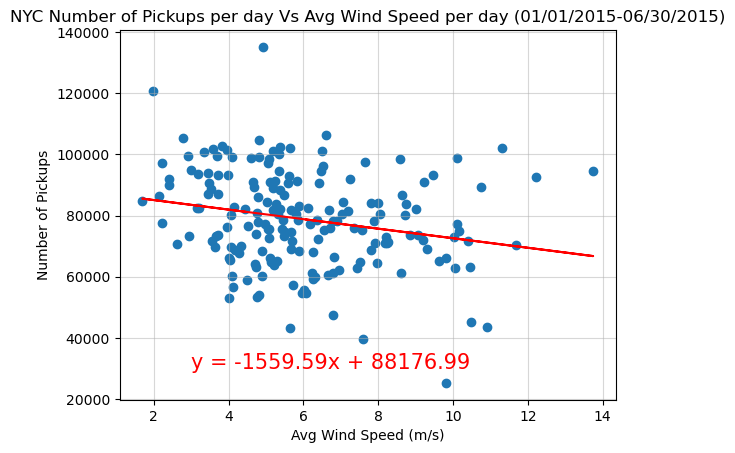

In [73]:
#plt.scatter(converted_wind_df["Wind Speed"], converted_wind_df["Number of Pickups"], edgecolors= "black", marker="o")
x_values= converted_wind_df["Wind Speed"]
y_values= converted_wind_df["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,30000),fontsize=15,color="red")
plt.title("NYC Number of Pickups per day Vs Avg Wind Speed per day (01/01/2015-06/30/2015)")
plt.ylabel("Number of Pickups")
plt.xlabel("Avg Wind Speed (m/s)")
plt.grid(True, alpha= 0.5)
print(f"The r-value is: {rvalue}")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [50]:
#Bronx DataFrame per Day

bronx_df= wind_df.loc[(wind_df["Borough"]=="Bronx"),:]
bronx_df= bronx_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
bronx_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,1075,6.086957
2015-01-02,545,7.541667
2015-01-03,719,6.202083
2015-01-04,590,5.638194
2015-01-05,487,10.868056


In [36]:
#Brooklyn DataFrame per Day

brooklyn_df=wind_df.loc[(wind_df["Borough"]=="Brooklyn"),:]
brooklyn_df=brooklyn_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
brooklyn_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,12528,6.086957
2015-01-02,7311,7.541667
2015-01-03,11007,6.202083
2015-01-04,8715,5.638194
2015-01-05,6537,10.868056


In [44]:
#EWR DataFrame Per Day

EWR_df=wind_df.loc[(wind_df["Borough"]=="EWR"),:]
EWR_df=EWR_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
EWR_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,1,6.086957
2015-01-02,0,7.541667
2015-01-03,0,6.202083
2015-01-04,0,5.638194
2015-01-05,1,10.868056


In [40]:
#Manhattan DataFrame Per Day

Manhattan_df=wind_df.loc[(wind_df["Borough"]=="Manhattan"),:]
Manhattan_df=Manhattan_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Manhattan_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,35870,6.086957
2015-01-02,27423,7.541667
2015-01-03,41691,6.202083
2015-01-04,27403,5.638194
2015-01-05,30879,10.868056


In [41]:
#Queens DataFrame Per Day

Queens_df=wind_df.loc[(wind_df["Borough"]=="Queens"),:]
Queens_df=Queens_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Queens_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,5108,6.086957
2015-01-02,4346,7.541667
2015-01-03,5773,6.202083
2015-01-04,6486,5.638194
2015-01-05,5649,10.868056


In [42]:
#Staten Island DataFrame Per Day

Staten_Island_df=wind_df.loc[(wind_df["Borough"]=="Staten Island"),:]
Staten_Island_df=Staten_Island_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Staten_Island_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,53,6.086957
2015-01-02,22,7.541667
2015-01-03,23,6.202083
2015-01-04,16,5.638194
2015-01-05,19,10.868056


In [65]:
#Create dataframe for when precipitation occurs and for when there is no precipitation
wind_precip_df= wind_df.loc[(wind_df["Precipitaion Amount"]>0),:]
wind_precip_df= wind_precip_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
wind_precip_df.head()

,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-03,26740,6.558333
2015-01-04,19300,5.930591
2015-01-05,1518,6.500000
2015-01-06,10141,1.854167
2015-01-09,7125,8.228947


In [66]:
wind_dry_df= wind_df.loc[(wind_df["Precipitaion Amount"]==0),:]
wind_dry_df= wind_dry_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
wind_dry_df.head()


,Number of Pickups,Wind Speed
Time of Observation,,
2015-01-01,54671,6.065359
2015-01-02,39668,7.582278
2015-01-03,32504,6.131356
2015-01-04,23930,5.356838
2015-01-05,42073,11.467626


In [68]:
#Does different boroughs? Ryan
borough_df= wind_df.groupby(["Borough"]).agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()

borough_df.head()


,Number of Pickups,Wind Speed
Borough,,
Bronx,220047,6.000039
Brooklyn,2321035,6.000039
EWR,105,6.000039
Manhattan,10367841,6.000039
Queens,1343528,6.000039


In [ ]:
# Correlation and Regression

## Analysis